# Finance Data Project 


## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [145]:
start_time = datetime(2010, 1, 6)
end_time = datetime(2019, 1, 1)

In [146]:
bank_dict = {"BAC": "Bank of America", "C": "City Group", "GS": "Goldman Sachs", 
                 "JPM": "JP Morgan Chase", "MS": "Morgan Stanley", "WFC": "Wells Fargo"}
df_bank = {}

# FETCH - Bank of America
print("\nCarregando dados...")
for bank in bank_dict:
    # FETCH - Bank
    print("{}...".format(bank_dict[bank]), end=" ")
    temp = data.DataReader(bank, 'stooq',start=start_time, end=end_time)
    df_bank[bank] = temp
    print("OK!")

print("IMPORT DONE!!!")


Carregando dados...
Bank of America... OK!
City Group... OK!
Goldman Sachs... OK!
JP Morgan Chase... OK!
Morgan Stanley... OK!
Wells Fargo... OK!
IMPORT DONE!!!


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [65]:
tickers = list(bank_dict.keys())
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [284]:
bank_stocks = pd.concat(df_bank, axis=1)

bank_stocks.head()

BAC                                            C          \
              Open    High     Low   Close       Volume    Open    High   
Date                                                                      
2010-01-04  13.976  14.444  13.868  14.388  196655640.0  31.465  31.932   
2010-01-05  14.435  14.866  14.397  14.859  227780652.0  32.028  33.244   
2010-01-06  14.866  15.170  14.702  15.033  223350268.0  33.336  34.461   
2010-01-07  15.298  15.756  15.143  15.528  348868792.0  34.555  34.649   
2010-01-08  15.572  15.684  15.251  15.389  239633385.0  34.180  34.368   

                                        ...      MS                          \
               Low   Close      Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2010-01-04  31.279  31.837  43385640.0  ...  26.888  27.998  26.824  27.069   
2010-01-05  31.932  33.057  71244304.0  ...  27.159  28.140  27.087  28.059   
2010-01-06  32.868  34.087  71852967.0  ...  27.998  28.541  27.840  28.419   
2010-01-07  33.806  34.180  71667549.0  ...  28.428  29.138  28.260  28.830   
2010-01-08  32.868  33.617  66549237.0  ...  28.549  28.745  28.007  28.241   

                           WFC                                      
                Volume    Open    High     Low   Close      Volume  
Date                                                                
2010-01-04  23264557.0  21.425  21.788  21.263  21.660  49569845.0  
2010-01-05  25718819.0  21.608  22.393  21.598  22.258  69876696.0  
2010-01-06  19445880.0  22.224  22.461  22.035  22.287  41917913.0  
2010-01-07  21344983.0  22.295  23.334  22.140  23.097  77716228.0  
2010-01-08  18264185.0  22.915  23.272  22.678  22.883  44782449.0  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you): ['Bank Ticker','Stock Info']

In [67]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [257]:
bank_stocks.head()

Bank Ticker     BAC                                            C          \
Stock Info     Open    High     Low   Close       Volume    Open    High   
Date                                                                       
2010-01-04   13.976  14.444  13.868  14.388  196655640.0  31.465  31.932   
2010-01-05   14.435  14.866  14.397  14.859  227780652.0  32.028  33.244   
2010-01-06   14.866  15.170  14.702  15.033  223350268.0  33.336  34.461   
2010-01-07   15.298  15.756  15.143  15.528  348868792.0  34.555  34.649   
2010-01-08   15.572  15.684  15.251  15.389  239633385.0  34.180  34.368   

Bank Ticker                              ...      MS                          \
Stock Info      Low   Close      Volume  ...    Open    High     Low   Close   
Date                                     ...                                   
2010-01-04   31.279  31.837  43385640.0  ...  26.888  27.998  26.824  27.069   
2010-01-05   31.932  33.057  71244304.0  ...  27.159  28.140  27.087  28.059   
2010-01-06   32.868  34.087  71852967.0  ...  27.998  28.541  27.840  28.419   
2010-01-07   33.806  34.180  71667549.0  ...  28.428  29.138  28.260  28.830   
2010-01-08   32.868  33.617  66549237.0  ...  28.549  28.745  28.007  28.241   

Bank Ticker                 WFC                                      
Stock Info       Volume    Open    High     Low   Close      Volume  
Date                                                                 
2010-01-04   23264557.0  21.425  21.788  21.263  21.660  49569845.0  
2010-01-05   25718819.0  21.608  22.393  21.598  22.258  69876696.0  
2010-01-06   19445880.0  22.224  22.461  22.035  22.287  41917913.0  
2010-01-07   21344983.0  22.295  23.334  22.140  23.097  77716228.0  
2010-01-08   18264185.0  22.915  23.272  22.678  22.883  44782449.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [69]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     32.204
C       77.299
GS     269.330
JPM    116.120
MS      57.116
WFC     62.875
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [149]:
returns = pd.DataFrame()
#bank_stocks_pct = pd.DataFrame()
bank_stocks_pct = bank_stocks

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [150]:
for ticker in tickers:
    bank_stocks_pct[ticker,"Return"] = bank_stocks[ticker].xs(key="Close",axis=1).pct_change()


In [160]:
banks_returns = bank_stocks_pct.xs(key="Return",axis=1, level=1)
banks_returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032736,0.038320,0.017592,0.019349,0.036573,0.027608
2010-01-06,0.011710,0.031158,-0.010678,0.005452,0.012830,0.001303
2010-01-07,0.032928,0.002728,0.019466,0.019873,0.014462,0.036344
2010-01-08,-0.008952,-0.016472,-0.018905,-0.002366,-0.020430,-0.009265


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

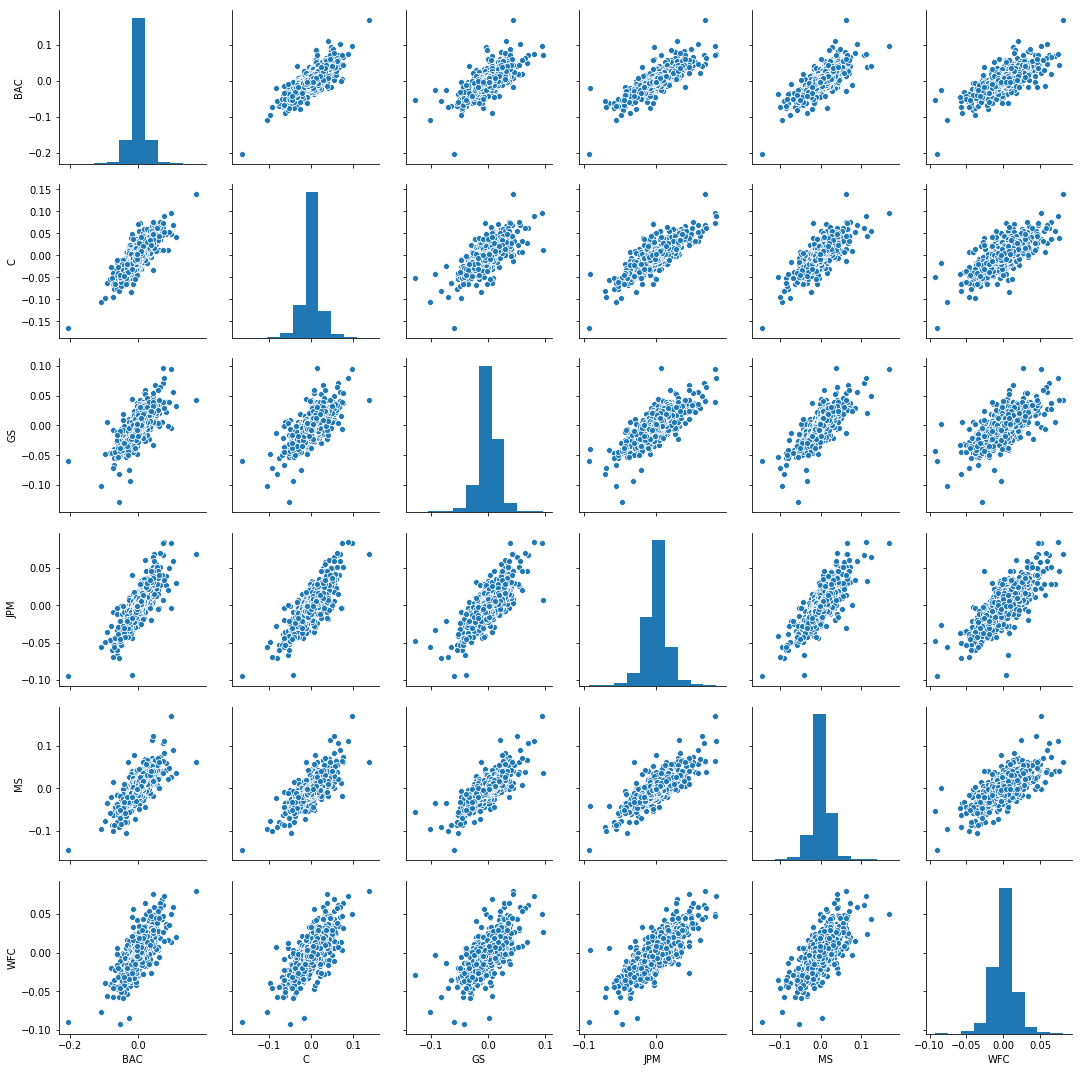

In [162]:
sns.pairplot(data=banks_returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [165]:
banks_returns.idxmax()

BAC   2011-08-09
C     2011-08-09
GS    2019-01-16
JPM   2011-11-30
MS    2011-10-27
WFC   2011-08-09
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [167]:
banks_returns.idxmin()

BAC   2011-08-08
C     2011-08-08
GS    2010-04-16
JPM   2011-08-08
MS    2011-08-08
WFC   2018-02-05
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [169]:
banks_returns.std()

BAC    0.020816
C      0.019762
GS     0.016578
JPM    0.016024
MS     0.021144
WFC    0.015271
dtype: float64

In [179]:
banks_returns["2015-01-01":"2015-12-31"].std(axis=0)

BAC    0.016150
C      0.015281
GS     0.014025
JPM    0.013965
MS     0.016007
WFC    0.012550
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

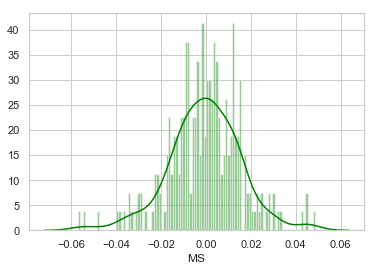

In [194]:
sns.set(style="whitegrid")
sns.distplot(banks_returns["2015-01-01":"2015-12-31"]["MS"], bins=100, color="green")


** Create a distplot using seaborn of the 2008 returns for CitiGroup **

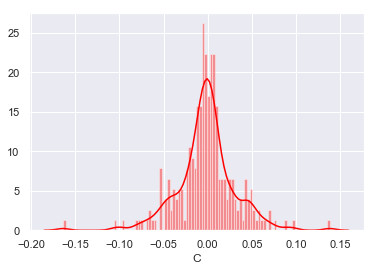

In [198]:
sns.set()
sns.distplot(banks_returns["2011-01-01":"2011-12-31"]["C"], color="red", bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly.plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [297]:
bank_stocks.xs(key="Close", axis=1,level=1).head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2010-01-04,14.388,31.837,154.62,34.368,27.069,21.660
2010-01-05,14.859,33.057,157.34,35.033,28.059,22.258
2010-01-06,15.033,34.087,155.66,35.224,28.419,22.287
2010-01-07,15.528,34.180,158.69,35.924,28.830,23.097
2010-01-08,15.389,33.617,155.69,35.839,28.241,22.883


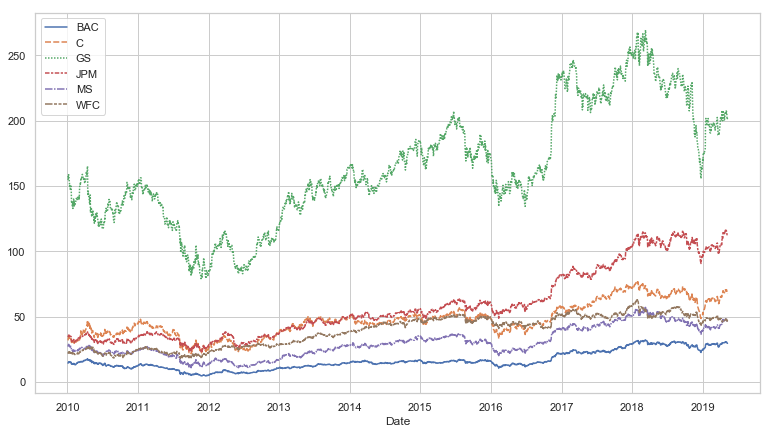

In [223]:
sns.set(style="whitegrid",rc={'figure.figsize':(13,7)})
sns.lineplot(data=bank_stocks.xs(key="Close", axis=1,level=1))


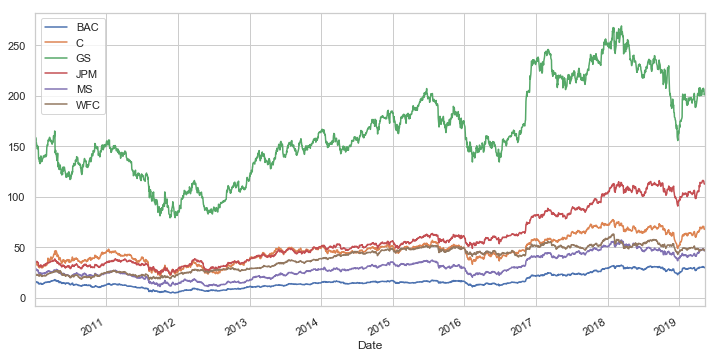

In [221]:
#forma diferente de implementar
for ticker in tickers:
    bank_stocks[ticker]["Close"].plot(kind="line", figsize=(12,6),label=ticker)
plt.legend()

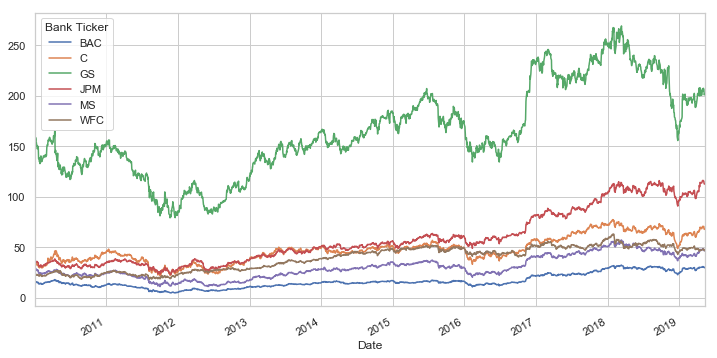

In [224]:
for ticker in tickers:
    bank_stocks[ticker]["Close"].plot(kind="line", figsize=(12,6),label=ticker)
plt.legend(title="Bank Ticker")

In [229]:
bank_stocks.xs(key="Close", axis=1,level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

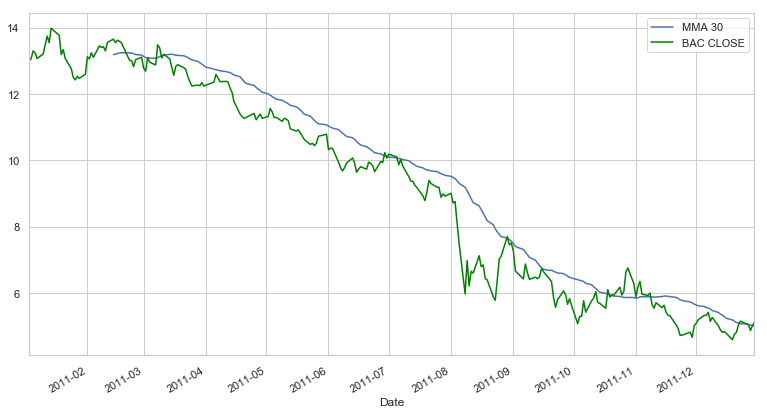

In [264]:
sns.set(style="whitegrid")
bank_stocks["BAC"]["Close"].loc["2011-01-01":"2011-12-31"].rolling(window=30).mean().plot(label="MMA 30")
bank_stocks["BAC"]["Close"].loc["2011-01-01":"2011-12-31"].plot(label="BAC CLOSE", color="green")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

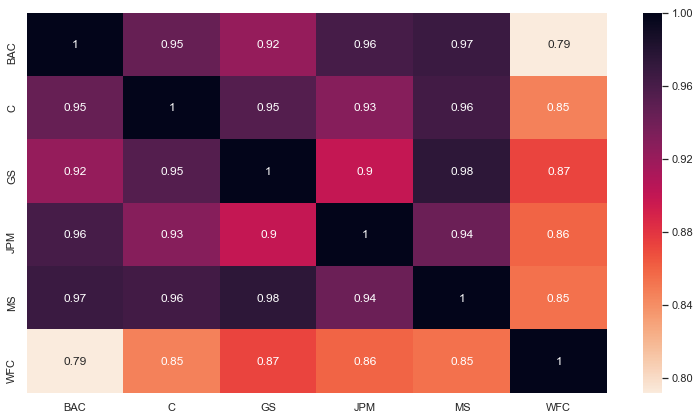

In [272]:
sns.heatmap(bank_stocks.xs(key="Close", axis=1,level=1).corr(), annot=True,cmap="rocket_r")

** Optional: Use seaborn's clustermap to cluster the correlations together:**

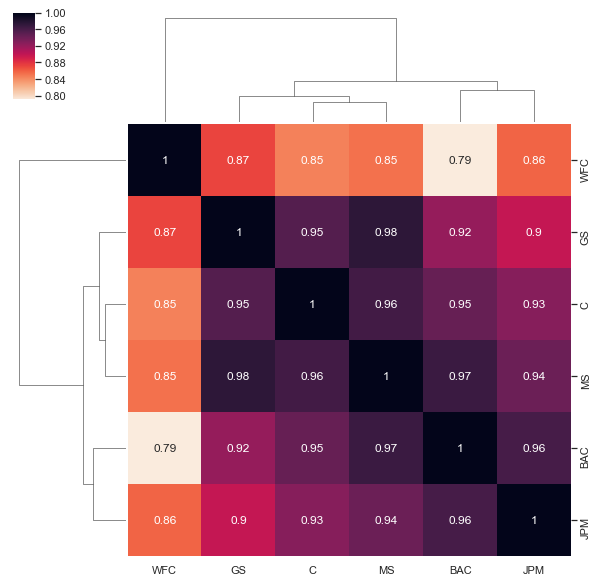

In [273]:
sns.clustermap(bank_stocks.xs(key="Close", axis=1,level=1).corr(), annot=True,cmap="rocket_r")

In [281]:
bank_stocks.xs(key="Close", axis=1,level=1).corr().iplot(kind="heatmap",colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [289]:
bank_stocks["BAC"].loc["2015-01-01":"2016-01-01"].iplot(kind="candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [293]:
bank_stocks["MS"]["Close"].loc["2015-01-01":"2015-12-31"].ta_plot(study="sma")

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [296]:
bank_stocks["BAC"]["Close"].loc["2015-01-01":"2015-12-31"].ta_plot(study="boll", color="red")

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.